# Student Details :-
Name: Kashish Soni

Project Title: Website A/B Testing for Conversion Optimization

Program Name:  Samatrix.io: Internships & Training for BCA AIDA (V SEMS) LNCT-U Bhopal

Internship Type: Online

Duration: 4 weeks 

Institution: LNCT University

Course: Bachelor of Computer Applications (BCA - AIDA)

Mentor/Guide: Vishwas Soni


#  A/B Testing Simulation Notebook
This notebook demonstrates how to perform and visualize an A/B test using Python.
It includes conversion rate simulation, confidence intervals, z-tests, and sequential monitoring.

In [1]:
!pip install scipy
!pip install statsmodels
from statsmodels.stats.proportion import proportion_confint

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

np.random.seed(42)
print("1. Python Environment Setup Complete")



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 3.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.6 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 3.3 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.6 MB 3.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 3.4 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.6 MB 3.6 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 3.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 3.8 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Python Environment Setup Complete


In [8]:

n_A = 10000 
n_B = 10000 
p_A_true = 0.10
p_B_true = 0.12

conversions_A = np.random.binomial(n=n_A, p=p_A_true)
conversions_B = np.random.binomial(n=n_B, p=p_B_true)

print("\n2. Simulated A/B Test Results")
print(f"Variant A (Control): {n_A} visitors, {conversions_A} conversions")
print(f"Variant B (Test): {n_B} visitors, {conversions_B} conversions")



2. Simulated A/B Test Results
Variant A (Control): 10000 visitors, 993 conversions
Variant B (Test): 10000 visitors, 1166 conversions


In [9]:

cr_A = conversions_A / n_A
cr_B = conversions_B / n_B

ci_A_lower, ci_A_upper = proportion_confint(count=conversions_A, nobs=n_A, alpha=0.05, method='normal')
ci_B_lower, ci_B_upper = proportion_confint(count=conversions_B, nobs=n_B, alpha=0.05, method='normal')

data = {
    'Variant': ['A', 'B'],
    'Visitors': [n_A, n_B],
    'Conversions': [conversions_A, conversions_B],
    'Conversion Rate': [f"{cr_A * 100:.2f}%", f"{cr_B * 100:.2f}%"],
    'CI (95%)': [
        f"({ci_A_lower*100:.2f}% - {ci_A_upper*100:.2f}%)",
        f"({ci_B_lower*100:.2f}% - {ci_B_upper*100:.2f}%)"
    ]
}
results_df = pd.DataFrame(data)

print("\n3. CR and CI Results")
print(results_df)

overlap = max(ci_A_lower, ci_B_lower) < min(ci_A_upper, ci_B_upper)
print(f"\nDo confidence intervals overlap? {'Yes' if overlap else 'No'}")



3. CR and CI Results
  Variant  Visitors  Conversions Conversion Rate           CI (95%)
0       A     10000          993           9.93%   (9.34% - 10.52%)
1       B     10000         1166          11.66%  (11.03% - 12.29%)

Do confidence intervals overlap? No


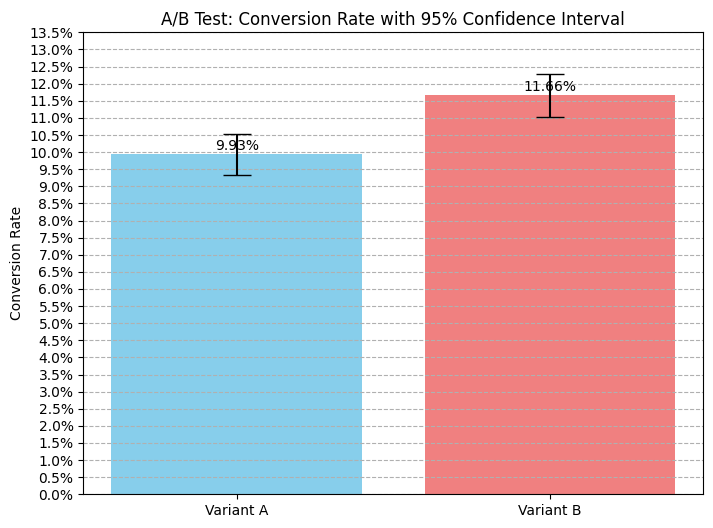

In [10]:

error_A = ci_A_upper - cr_A
error_B = ci_B_upper - cr_B

plt.figure(figsize=(8, 6))
bars = plt.bar(
    ['Variant A', 'Variant B'],
    [cr_A, cr_B],
    yerr=[error_A, error_B],
    capsize=10,
    color=['skyblue', 'lightcoral']
)
plt.title('A/B Test: Conversion Rate with 95% Confidence Interval')
plt.ylabel('Conversion Rate')
plt.yticks(np.arange(0, max(cr_A, cr_B) * 1.2, 0.005))
plt.gca().set_yticklabels(['{:.1f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.0005, f'{yval*100:.2f}%', ha='center', va='bottom')

plt.show()


In [11]:

count = np.array([conversions_B, conversions_A])
nobs = np.array([n_B, n_A])

z_statistic, p_value = proportions_ztest(count=count, nobs=nobs, alternative='two-sided')

print("\n5. Two-Proportion Z-Test Results")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: Reject Null Hypothesis (p < {alpha}) → Variant B performs better.")
else:
    print(f"Conclusion: Fail to Reject Null Hypothesis (p ≥ {alpha}) → No significant difference.")



5. Two-Proportion Z-Test Results
Z-statistic: 3.9421
P-value: 0.000081
Conclusion: Reject Null Hypothesis (p < 0.05) → Variant B performs better.


In [12]:

total_batches = 60
batch_size = 100

p_values_over_time = []
lift_over_time = []
cumulative_visitors = []

cumulative_n_A, cumulative_n_B = 0, 0
cumulative_conv_A, cumulative_conv_B = 0, 0

print("\n6. & 7. Live A/B Test Simulation (Sequential Monitoring)")

for batch in range(1, total_batches + 1):
    n_A_batch = batch_size
    n_B_batch = batch_size

    conv_A_batch = np.random.binomial(n=n_A_batch, p=p_A_true)
    conv_B_batch = np.random.binomial(n=n_B_batch, p=p_B_true)

    cumulative_n_A += n_A_batch
    cumulative_n_B += n_B_batch
    cumulative_conv_A += conv_A_batch
    cumulative_conv_B += conv_B_batch

    cr_A_current = cumulative_conv_A / cumulative_n_A
    cr_B_current = cumulative_conv_B / cumulative_n_B
    observed_lift = (cr_B_current - cr_A_current) * 100

    count_current = np.array([cumulative_conv_B, cumulative_conv_A])
    nobs_current = np.array([cumulative_n_B, cumulative_n_A])
    z_stat, p_value = proportions_ztest(count_current, nobs_current, alternative='two-sided')

    cumulative_visitors.append(cumulative_n_A + cumulative_n_B)
    p_values_over_time.append(p_value)
    lift_over_time.append(observed_lift)

    if batch % 10 == 0 or batch == total_batches:
        print(f"\nBatch {batch}/{total_batches} ({cumulative_n_A + cumulative_n_B} Total Visitors)")
        print(f"Variant A: {cr_A_current*100:.2f}%, Variant B: {cr_B_current*100:.2f}%")
        print(f"Observed Lift: {observed_lift:.2f}%, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("→ Significant lift detected (p < 0.05)")
        else:
            print("→ Not yet significant (p ≥ 0.05)")



6. & 7. Live A/B Test Simulation (Sequential Monitoring)

Batch 10/60 (2000 Total Visitors)
Variant A: 10.00%, Variant B: 11.10%
Observed Lift: 1.10%, P-value: 0.4233
→ Not yet significant (p ≥ 0.05)

Batch 20/60 (4000 Total Visitors)
Variant A: 9.80%, Variant B: 11.65%
Observed Lift: 1.85%, P-value: 0.0587
→ Not yet significant (p ≥ 0.05)

Batch 30/60 (6000 Total Visitors)
Variant A: 10.27%, Variant B: 11.20%
Observed Lift: 0.93%, P-value: 0.2429
→ Not yet significant (p ≥ 0.05)

Batch 40/60 (8000 Total Visitors)
Variant A: 10.03%, Variant B: 11.43%
Observed Lift: 1.40%, P-value: 0.0430
→ Significant lift detected (p < 0.05)

Batch 50/60 (10000 Total Visitors)
Variant A: 10.18%, Variant B: 11.52%
Observed Lift: 1.34%, P-value: 0.0312
→ Significant lift detected (p < 0.05)

Batch 60/60 (12000 Total Visitors)
Variant A: 10.25%, Variant B: 11.80%
Observed Lift: 1.55%, P-value: 0.0067
→ Significant lift detected (p < 0.05)


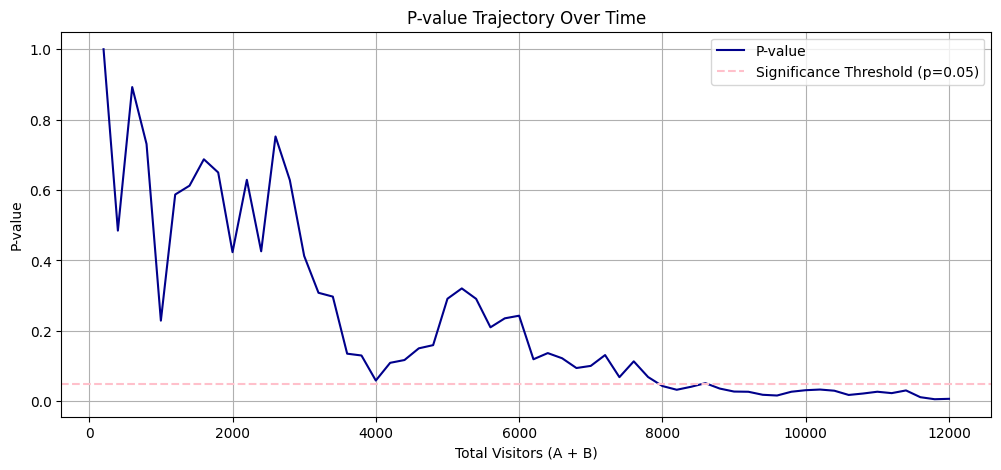

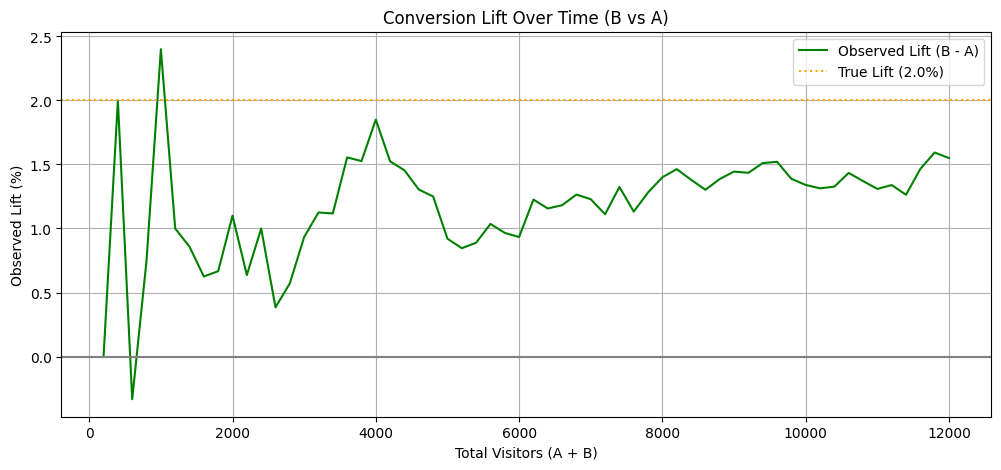

In [13]:

plt.figure(figsize=(12, 5))
plt.plot(cumulative_visitors, p_values_over_time, label='P-value', color='darkblue')
plt.axhline(y=0.05, color='pink', linestyle='--', label='Significance Threshold (p=0.05)')
plt.xlabel('Total Visitors (A + B)')
plt.ylabel('P-value')
plt.title('P-value Trajectory Over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(cumulative_visitors, lift_over_time, label='Observed Lift (B - A)', color='green')
plt.axhline(y=0, color='gray', linestyle='-')
plt.axhline(y=(p_B_true - p_A_true) * 100, color='orange', linestyle=':', label='True Lift (2.0%)')
plt.xlabel('Total Visitors (A + B)')
plt.ylabel('Observed Lift (%)')
plt.title('Conversion Lift Over Time (B vs A)')
plt.legend()
plt.grid(True)
plt.show()
